In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [72]:
google=pd.read_csv("Google.csv",index_col=[0],parse_dates=[0])
google.head(5)


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [73]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [74]:
google=google.drop([ 'High', 'Low', 'Close', 'Volume'], axis='columns')

In [75]:
google.head(5)

,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04


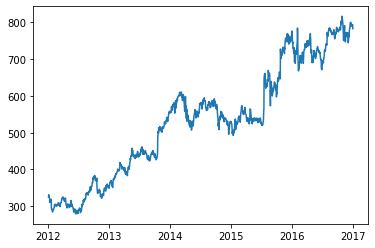

In [76]:
plt.plot(google)
plt.show()

In [77]:
google.describe()

,Open
count,1258.000000
mean,533.709833
std,151.904442
min,279.120000
25%,404.115000
50%,537.470000
75%,654.922500
max,816.680000


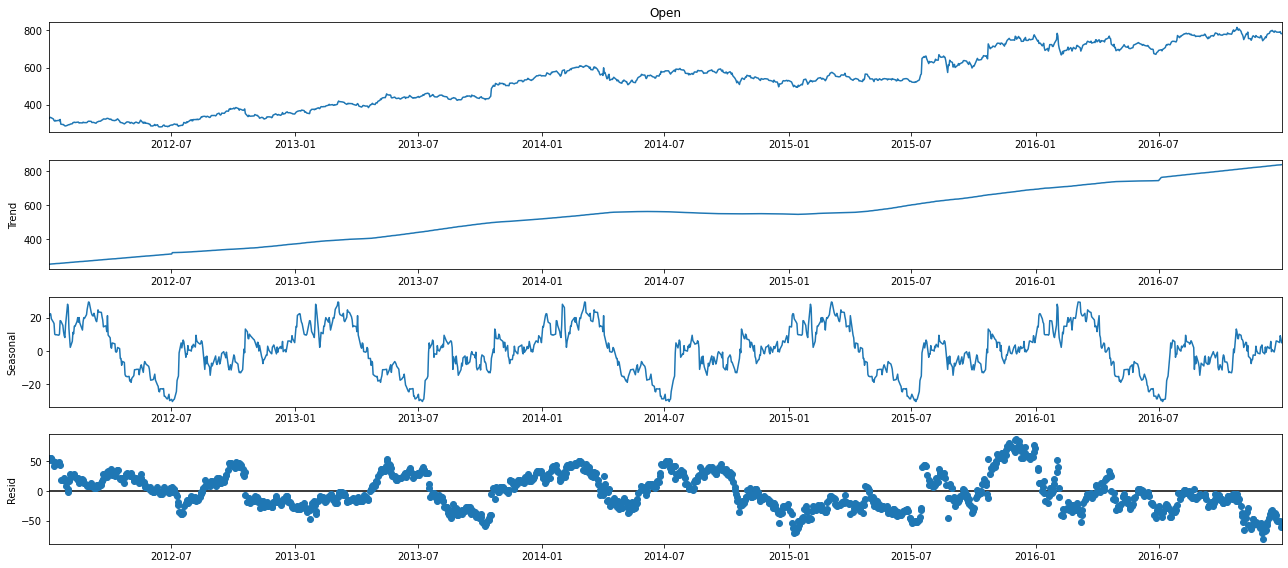

In [90]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(google['Open'],period=252,extrapolate_trend="freq")
fig = decomposition.plot()
plt.show()


In [91]:
### testing trend seasonality and randomness of series

#making index column (Date) as Column\
google_1=google.reset_index()

In [92]:
#taking only the second column
def Series_to_list(y):
    google_1=y.reset_index()    
    google_open=google_1["Open"]
    out=list()
    out[:] = google_open.values.tolist()
    return out

In [93]:
from scipy.stats import norm
from scipy.stats import chi2
import math
import numpy as np

In [94]:
y=Series_to_list(google["Open"])

In [95]:
## Define relative ordering test
def ro_test(y):
    n=len(y)
    q=0
    for i in range(0,n-1):
        for j in range(i+1,n):
            if y[i]>y[j]:
                q=q+1
    eq=n*(n-1)
    tau=1-(4*q/eq)
    var_tau= (2*(2*n+5))/(9*eq)
    z=tau/math.sqrt(var_tau)
    if z>0:
        p_value=1-norm.cdf(z)
    if z<0:
        p_value=norm.cdf(z)
    print(" Relative Ordering Test for Presence of Trend \n\n")
    print("Null Hypothesis: Absence of Trend, and \n")
    print("Test Statistic:",round(z,4),"\n")
    print("p_value:", round(p_value,4),"\n")
    print("No. of Discordants:",q,"\n")
    print("Expected No. of Discordants:",eq/4,"\n")



In [96]:
ro_test(y)
# p value is less than 0.5 hence we reject null hypothsis means there exist a trend in data 

 Relative Ordering Test for Presence of Trend 


Null Hypothesis: Absence of Trend, and 

Test Statistic: 41.9461 

p_value: 0.0 

No. of Discordants: 83208 

Expected No. of Discordants: 395326.5 



In [97]:
##testing randomness turning point test
###testing randomness
def turningpoints(x):
    N=0
    for i in range(1, len(x)-1):
        if ((x[i-1] < x[i] and x[i+1] < x[i]) 
         or (x[i-1] > x[i] and x[i+1] > x[i])):
            N += 1
    return N
n=len(y)
p=turningpoints(y)
exp_p=(2/3)*(n-2)
var_p=(16*n-29)/90
z=(p-exp_p)/math.sqrt(var_p)
if z>0:
    p_value=1-norm.cdf(z)
if z<0:
    p_value=norm.cdf(z)
print("Turning Point test for randomness \n\n")
print("Null Hypothesis:Series is purely Random, and \n")
print("Alternative Hypothesis: Series is not purely random \n\n")
print("Test Statistic:",round(z,4),"\n")
print("p_value:", round(p_value,4),"\n")

##### We can observed that p value is less than the 0.5 hence we reject the null hypothesis.





Turning Point test for randomness 


Null Hypothesis:Series is purely Random, and 

Alternative Hypothesis: Series is not purely random 


Test Statistic: -14.744 

p_value: 0.0 



In [98]:
#test for stationarity
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-fuller Test")
dftest=adfuller(google['Open'], autolag='AIC',)
dfoutput=pd.Series(dftest[0:4], index=["Test Statistics","p-value","lags_used", "no of observation used"])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
    
print(dfoutput)
##Still present non stationarity

Result of Dickey-fuller Test
Test Statistics             -0.776211
p-value                      0.826010
lags_used                    0.000000
no of observation used    1257.000000
Critical value (1%)         -3.435563
Critical value (5%)         -2.863842
Critical value (10%)        -2.567996
dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

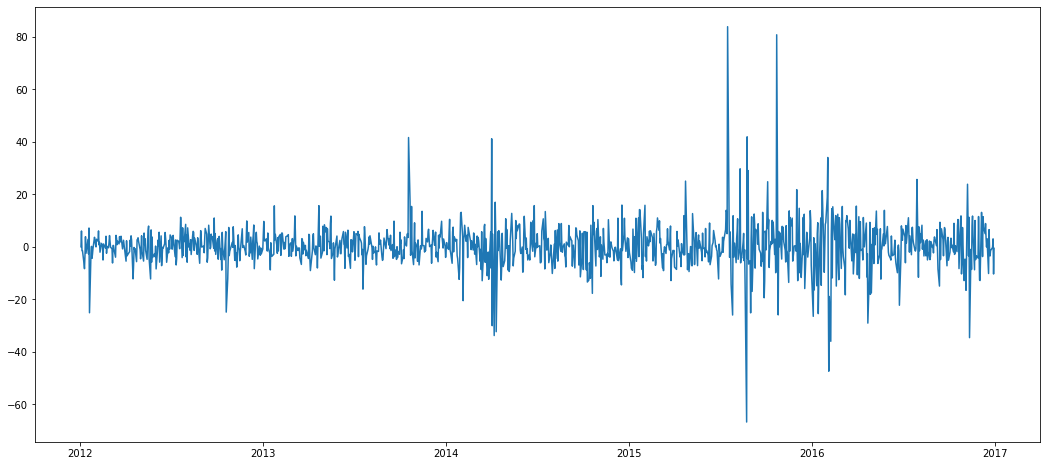

In [99]:
#Differencing previous value
detrend=google.diff(1).fillna(0)
plt.plot(detrend)
plt.show


In [100]:
detrend.head(5)

,Open
Date,
2012-01-03,0.00
2012-01-04,6.02
2012-01-05,-1.44
2012-01-06,-1.49
2012-01-09,-6.30


In [101]:
#Convert open column of table in list
y=Series_to_list(detrend)

In [102]:
ro_test(y)
#We accept the null hypothesis 

 Relative Ordering Test for Presence of Trend 


Null Hypothesis: Absence of Trend, and 

Test Statistic: 0.2998 

p_value: 0.3822 

No. of Discordants: 393096 

Expected No. of Discordants: 395326.5 



In [103]:
n=len(y)
p=turningpoints(y)
exp_p=(2/3)*(n-2)
var_p=(16*n-29)/90
z=(p-exp_p)/math.sqrt(var_p)
if z>0:
    p_value=1-norm.cdf(z)
if z<0:
    p_value=norm.cdf(z)
print("Turning Point test for randomness \n\n")
print("Null Hypothesis:Series is purely Random, and \n")
print("Alternative Hypothesis: Series is not purely random \n\n")
print("Test Statistic:",round(z,4),"\n")
print("p_value:", round(p_value,4),"\n")


Turning Point test for randomness 


Null Hypothesis:Series is purely Random, and 

Alternative Hypothesis: Series is not purely random 


Test Statistic: 0.3123 

p_value: 0.3774 



In [104]:
#test for stationarity
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-fuller Test")
dftest=adfuller(detrend, autolag='AIC',)
dfoutput=pd.Series(dftest[0:4], index=["Test Statistics","p-value","lags_used", "no of observation used"])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
    
print(dfoutput)

Result of Dickey-fuller Test
Test Statistics          -1.760338e+01
p-value                   3.911433e-30
lags_used                 4.000000e+00
no of observation used    1.253000e+03
Critical value (1%)      -3.435580e+00
Critical value (5%)      -2.863849e+00
Critical value (10%)     -2.568000e+00
dtype: float64


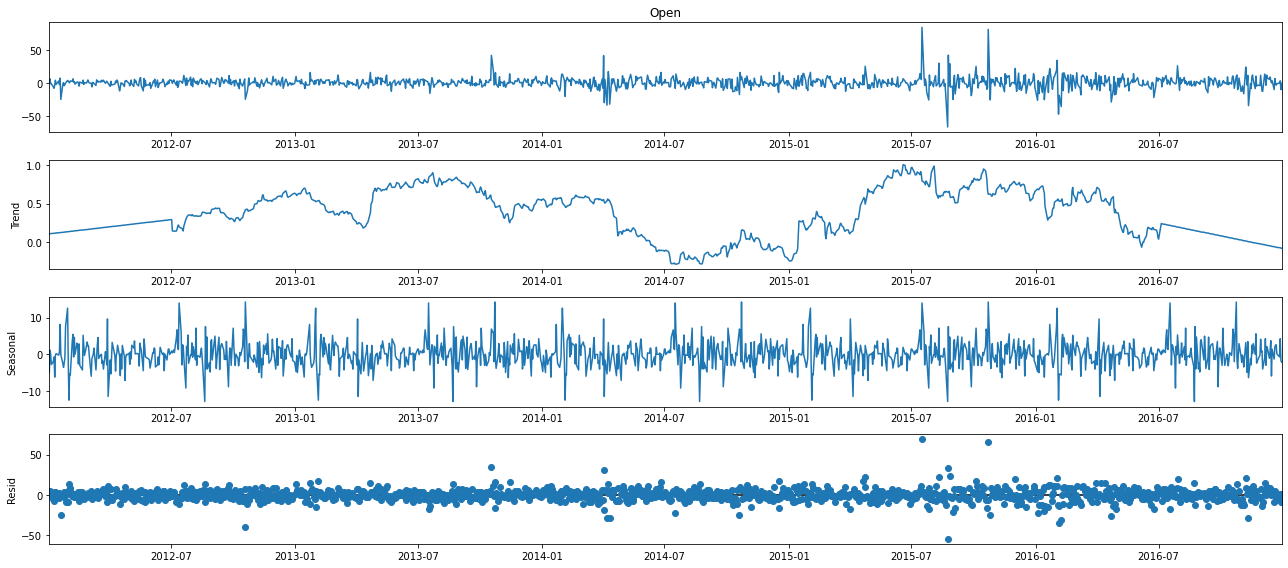

In [106]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(detrend['Open'], model='additive', period=252, extrapolate_trend="freq")
fig = decomposition.plot()
plt.show()

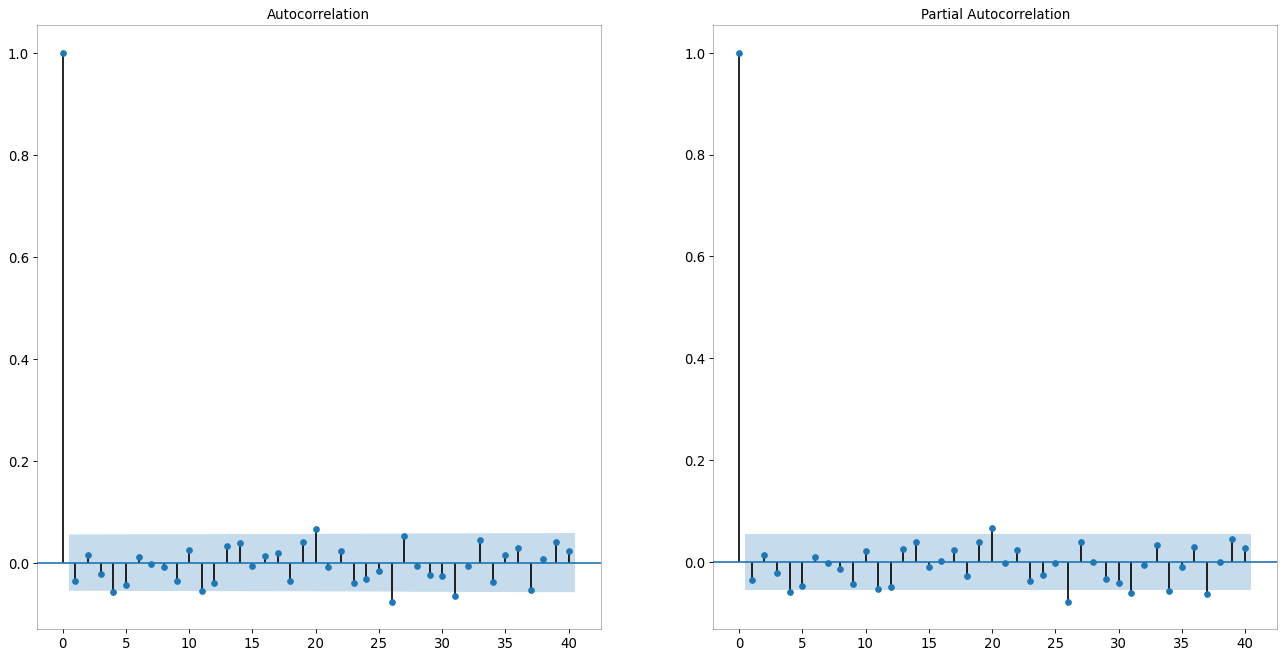

In [111]:
#ACF and PACF plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10), dpi= 80)
plot_acf(detrend, ax=ax1, lags= 40)
plot_pacf(detrend, ax=ax2, lags= 40, method='ols')

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()


In [132]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(google,order=(2,1,3))
model_fit=model.fit()
model_fit.summary()

C:\Users\1205n\anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\1205n\anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\1205n\anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 1258
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -4451.668
Date:                Sun, 29 Nov 2020   AIC                           8915.336
Time:                        16:14:40   BIC                           8946.155
Sample:                             0   HQIC                          8926.919
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1380      0.013     88.072      0.000       1.113       1.163
ar.L2         -0.9694      0.015    -64.168      0.000      -0.999      -0.940
ma.L1         -1.1790      0.021    -56.166      0.000      -1.220      -1.138
ma.L2          1.0385      0.020     52.021      0.000       0.999       1.078
ma.L3         -0.0675      0.018     -3.840      0.000      -0.102      -0.033
sigma2        69.7497      0.894     78.037      0.000      67.998      71.502
===================================================================================
Ljung-Box (Q):                       50.34   Jarque-Bera (JB):             20923.59
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               6.00   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
forecast= model_fit.forecast(steps=20)
forecast

C:\Users\1205n\anaconda33\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


1258    780.487858
1259    779.493605
1260    780.536609
1261    782.687426
1262    784.123933
1263    783.673585
1264    781.768473
1265    780.037033
1266    779.913546
1267    781.451555
1268    783.321530
1269    783.958556
1270    782.870657
1271    781.015060
1272    779.958040
1273    780.554045
1274    782.257024
1275    783.617230
1276    783.514206
1277    782.078319
dtype: float64

In [134]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

org= [778.81,788.36,786.08,795.26,806.4,807.86,805,807.14,807.48,807.08,805.81,805.12,806.91,807.25,822.3,829.62, 
       837.81,834.71,814.66,796.86]
mean_absolute_percentage_error(org, forecast)

3.1678659393687374